# Figures for main paper

In [7]:
import seaborn as sns
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import json
from copy import deepcopy

# set seaborn settings for neurips paper
sns.set_context("paper")
sns.set_style("whitegrid")
sns.set_palette("colorblind")

flier_props = dict(markerfacecolor='0.75', markersize=2,
              linestyle='none')

In [8]:
methods = ['OracleCPS', 'CCT-learner', 'CMC-T-learner', 'pseudo-CMC-T-learner', 'CMC-S-learner', 'pseudo-CMC-S-learner',
           'CMC-X-learner', 'pseudo-CMC-X-learner', 'BART', 'CEVAE', 'CMGP', 'DKLITE', 'GANITE', 'NOFLITE',
           'CCT-learner-NOFLITE', 'DiffPO', 'FCCN', 'CCT-learner-FCCN']
palette = dict(zip(
    methods,
    sns.color_palette("tab20", n_colors=len(methods))  # you can pick any palette
))

## ACIC 2016  & EDU 

In [9]:
df_acic2016 = pd.read_csv("../../results/outputs/summary/ACIC2016_dist_summary.csv")
df_edu = pd.read_csv("../../results/outputs/summary/edu_dist_summary.csv")

df_edu.loc[df_edu["Method"].str.contains("CTT"), "Method"] = df_edu.loc[df_edu["Method"].str.contains("CTT"), "Method"].str.replace("CTT", "CCT")
df_acic2016.loc[df_acic2016["Method"].str.contains("CTT"), "Method"] = df_acic2016.loc[df_acic2016["Method"].str.contains("CTT"), "Method"].str.replace("CTT", "CCT")

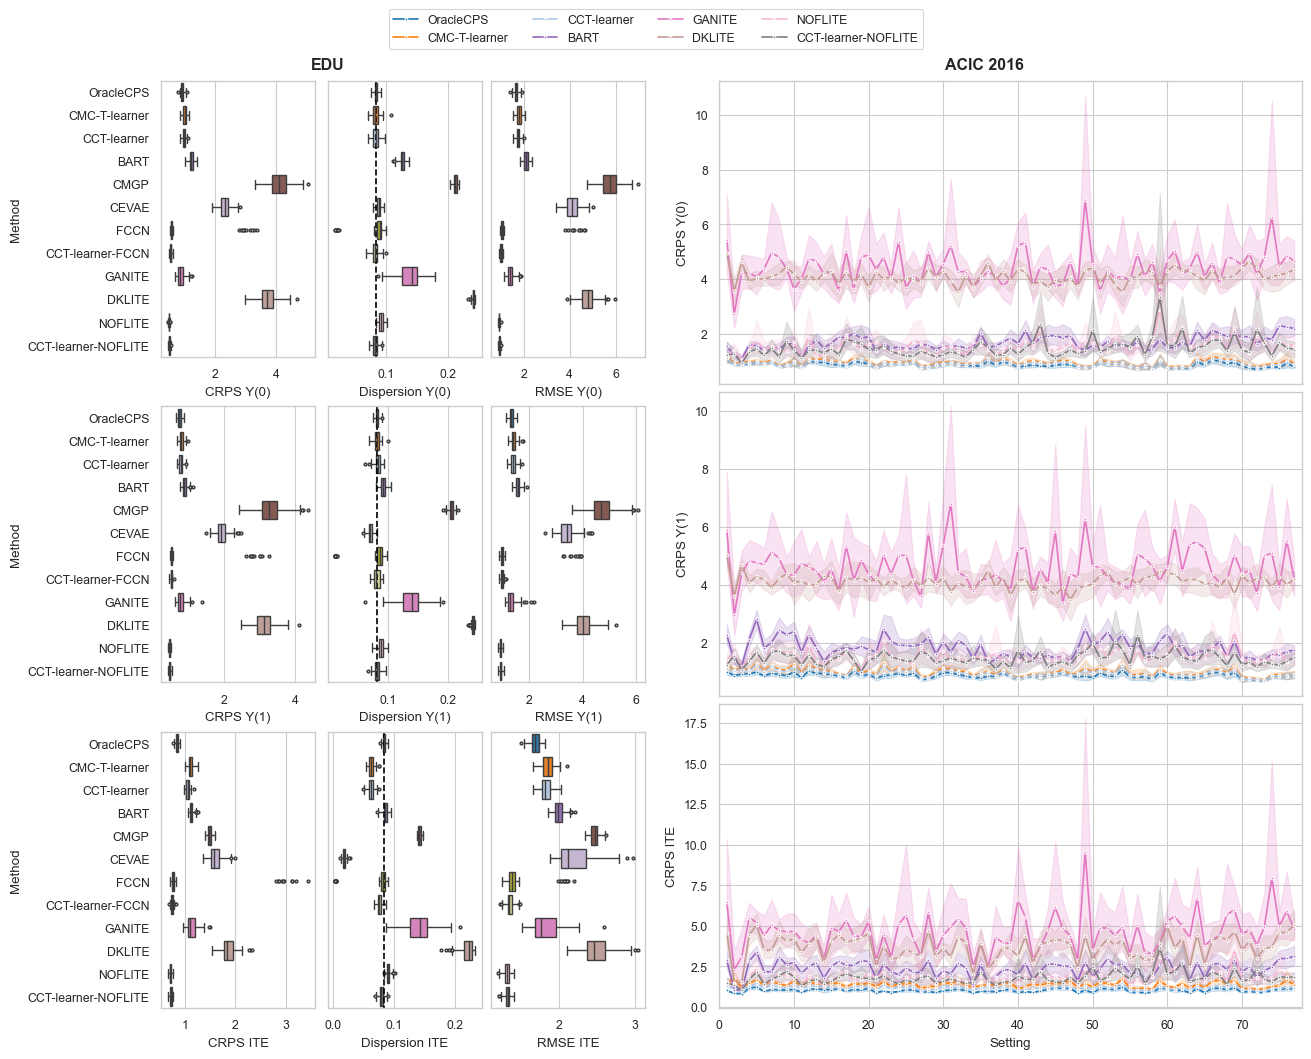

In [10]:
excluded_methods_edu = ["DiffPO", "pseudo-CMC-T-learner", "pseudo-CMC-S-learner", "pseudo-CMC-X-learner",  "CMC-S-learner", "CMC-X-learner"]
excluded_methods_acic2016 = ["DiffPO", "CEVAE", "CMGP", "FCCN", "CCT-learner-FCCN", "pseudo-CMC-T-learner", "pseudo-CMC-S-learner", "pseudo-CMC-X-learner",  "CMC-S-learner", "CMC-X-learner"]
df_edu_filtered = df_edu[~df_edu["Method"].isin(excluded_methods_edu)]
df_acic2016_filtered = df_acic2016[~df_acic2016["Method"].isin(excluded_methods_acic2016)]
df_acic2016_filtered = df_acic2016_filtered.rename(columns={"sim_nb":"Setting"})


fig = plt.figure(constrained_layout=True, figsize=(13, 10))
subfigs = fig.subfigures(nrows=1, ncols=2)
subfigs[0].suptitle('EDU', fontweight='semibold')
axsA = subfigs[0].subplots(3, 3, sharey=True)
subfigs[1].suptitle('ACIC 2016', fontweight='semibold')
axsB = subfigs[1].subplots(3, 1, sharex=True)
target_name_list = ["Y(0)", "Y(1)", "ITE"]
for i, target in enumerate(["y0", "y1", "ite"]):
    sns.boxplot(data=df_edu_filtered, y="Method", x=f"crps_{target}", ax=axsA[i, 0],
                hue="Method", dodge=False, flierprops=flier_props, palette=palette)
    # Change the x-axis label
    axsA[i, 0].set_xlabel(f"CRPS {target_name_list[i]}")
    sns.boxplot(data=df_edu_filtered, y="Method", x=f"dispersion_{target}", ax=axsA[i, 1],
                hue="Method", dodge=False, flierprops=flier_props, palette=palette)
    axsA[i, 1].vlines(1/12, -0.5, 18, linestyle='--', color='black', label='Ideal Dispersion')
    axsA[i, 1].set_xlabel(f"Dispersion {target_name_list[i]}")
    sns.boxplot(data=df_edu_filtered, y="Method", x=f"rmse_{target}", ax=axsA[i, 2],
                hue="Method", dodge=False, flierprops=flier_props, palette=palette)
    axsA[i, 2].set_xlabel(f"RMSE {target_name_list[i]}")


errorbar = ("ci", 95)

# dict comprehsion from palette
markers_dict = {k: "o" for k, v in zip(methods, palette.values())}
sns.lineplot(df_acic2016_filtered, x="Setting", y=f"crps_y0", hue="Method",
             markers=markers_dict, dashes=False, ax=axsB[0], errorbar=errorbar, palette=palette, style="Method", markersize=2)
sns.lineplot(df_acic2016_filtered, x="Setting", y=f"crps_y1", hue="Method",
                markers=markers_dict, dashes=False, ax=axsB[1], errorbar=errorbar, palette=palette, style="Method", markersize=2)
sns.lineplot(df_acic2016_filtered, x="Setting", y=f"crps_ite", hue="Method",
                markers=markers_dict, dashes=False, ax=axsB[2], errorbar=errorbar, palette=palette, style="Method", markersize=2)
axsB[0].set_ylabel("CRPS Y(0)")
axsB[1].set_ylabel(r"CRPS Y(1)")
axsB[2].set_ylabel(r"CRPS ITE")

# axs[0].set_ylim(0, 5)
#axs[1].set_ylim(0, 50)
# axs[2].set_ylim(1, 6)
axsB[2].set_xlim(0,78)
# set only one legend and remove the others
handles, labels = axsB[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=4, bbox_to_anchor=(0.5, 1.05))
axsB[0].get_legend().remove()
axsB[1].get_legend().remove()
axsB[2].get_legend().remove()

fig.savefig("../../results/figures/results_dist_edu_acic2016.pdf", bbox_inches='tight')
fig.savefig("../../results/figures/results_dist_edu_acic2016.png", bbox_inches='tight')
plt.show()